# Plot average adjacency matrices

First, we visualize the data set.
We plot average, log10 transformed connectomes for each mouse strain.
This notebook replicates Figure 2 in _Multiscale Comparative Connectomics._
![Fig2](figures/2_connectome.jpg)

In [1]:
%load_ext nb_black
%load_ext rpy2.ipython

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
from graspologic.datasets import load_mice

<IPython.core.display.Javascript object>

In [3]:
mice = load_mice()

<IPython.core.display.Javascript object>

In [4]:
def get_average_connectome(strain, mice):
    graphs = np.array(mice.graphs)
    sample = graphs[mice.labels == strain]
    average = np.array(sample).mean(axis=0)
    average = np.log10(average + 1)
    return average

<IPython.core.display.Javascript object>

In [5]:
btbr = get_average_connectome("BTBR", mice)
b6 = get_average_connectome("B6", mice)
cast = get_average_connectome("CAST", mice)
dba2 = get_average_connectome("DBA2", mice)

<IPython.core.display.Javascript object>

In [6]:
%%R
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(circlize))

<IPython.core.display.Javascript object>

In [7]:
%%R -i btbr -i b6 -i cast -i dba2

plotting.labels <- c('I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
                     'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
                     'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
                     'I', 'I', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
                     'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'S', 'S', 'S', 'S',
                     'S', 'S', 'S', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
                     'D', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'H', 'H', 'H',
                     'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
                     'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'W',
                     'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
                     'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
                     'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
                     'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W')
plotting.labels <- c(plotting.labels, tolower(plotting.labels))
plotting.labels <- factor(plotting.labels, levels = unique(plotting.labels))

vmax = max(b6)

# Make the heatmap
plot.heatmap <- function(matrix, name) {
    ha = HeatmapAnnotation(foo = anno_block(gp = gpar(fill = 2:8, col = 0)),
                       height = unit(2, "mm"))
    ra = rowAnnotation(foo = anno_block(gp = gpar(fill = 2:8, col = 0)),
                       width = unit(2, "mm"))
    ht <- Heatmap(
        matrix = matrix, col = colorRamp2(c(0, vmax), c("white", "red")),
        border = TRUE, rect_gp = gpar(lwd=0.0, col=0),
        name = "Edge Weight", column_title = name,
        cluster_columns = FALSE, cluster_column_slices = FALSE, show_column_names = FALSE,
        cluster_rows = FALSE, cluster_row_slices = FALSE, show_row_names = FALSE, row_title = NULL,
        column_split = plotting.labels, row_split = plotting.labels,
        top_annotation = ha,
        left_annotation = ra,
    )
    draw(ht)
}

<IPython.core.display.Javascript object>

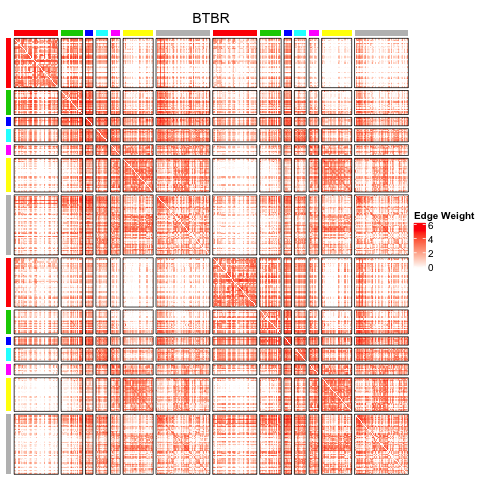

<IPython.core.display.Javascript object>

In [8]:
%%R
plot.heatmap(btbr, "BTBR")

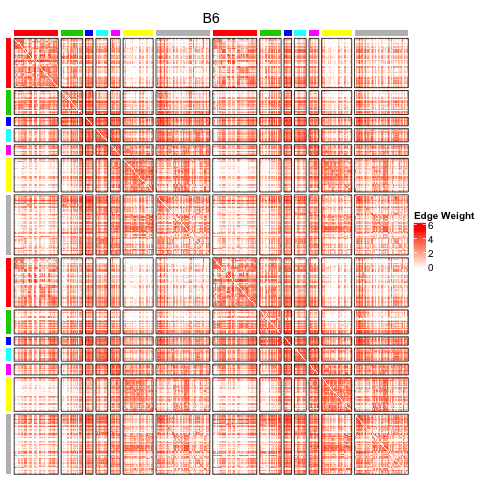

<IPython.core.display.Javascript object>

In [9]:
%%R
plot.heatmap(b6, "B6")

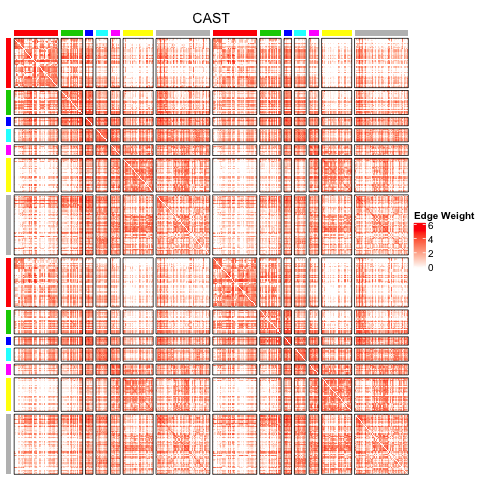

<IPython.core.display.Javascript object>

In [10]:
%%R
plot.heatmap(cast, "CAST")

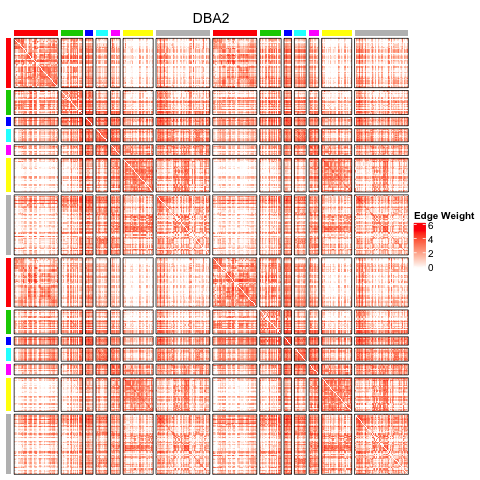

<IPython.core.display.Javascript object>

In [11]:
%%R
plot.heatmap(dba2, "DBA2")

Small lettering in each block were added posthoc.

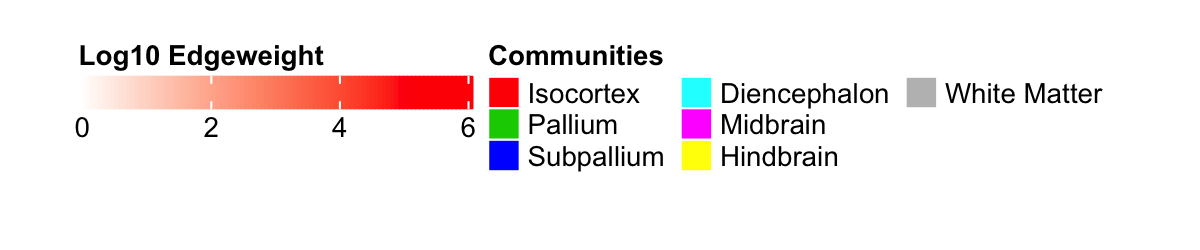

<IPython.core.display.Javascript object>

In [12]:
%%R -w 6 -h 1.25 --units in -r 200

# Make legend
colorbar <- Legend(col_fun = colorRamp2(c(0, vmax), c("white", "red")), title = "Log10 Edgeweight", legend_width = unit(5, "cm"), direction = "horizontal")
regions <- Legend(
    labels = c("Isocortex", "Pallium", "Subpallium", "Diencephalon", "Midbrain", "Hindbrain", "White Matter"), 
    title = "Communities", 
    legend_gp = gpar(fill = 2:8), nrow = 3
)
pd = packLegend(colorbar, regions, direction = "horizontal")
draw(pd, x = unit(1, "cm"), y = unit(1, "cm"), just = c("left", "bottom"))